# 测试Keras环境

In [879]:
import keras 
keras.__version__

'2.3.1'

# 数据提取

In [880]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [881]:
data_train=pd.read_csv("../和鲸练习赛-民宿价格预测/data/训练集.csv")
data_test=pd.read_csv("../和鲸练习赛-民宿价格预测/data/测试集.csv")

In [882]:
data_train.head(5)

,数据ID,容纳人数,便利设施,洗手间数量,床的数量,床的类型,卧室数量,取消条款,所在城市,清洁费,...,最近评论日期,维度,经度,民宿周边,评论个数,房产类型,民宿评分,房型,邮编,价格
0,train_0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.5,3.0,4,2.0,0,3,0,...,2016-06-26,34.109039,-118.273390,Los Feliz,12,17,97.0,0,90027,64.918531
1,train_1,2,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",1.0,1.0,4,1.0,2,4,1,...,2016-07-31,40.812897,-73.919163,Mott Haven,6,0,87.0,0,10454,54.918531
2,train_2,4,"{TV,""Air conditioning"",Kitchen,Heating,""Smoke ...",1.0,2.0,4,0.0,2,4,1,...,2017-07-31,40.737643,-73.953309,Greenpoint,4,0,80.0,0,11222,73.219281
3,train_3,2,{},1.0,1.0,4,1.0,0,5,1,...,NaN,37.759935,-122.420558,Mission District,0,0,NaN,1,94110,64.093909
4,train_4,3,"{Internet,""Wireless Internet"",""Air conditionin...",1.0,1.0,4,1.0,1,4,1,...,2016-05-22,40.683363,-73.949490,Bedford-Stuyvesant,16,0,99.0,0,11216,68.454901


# 数据处理

## 便利设施属性处理

In [883]:
def str_count(strr):
    a=strr.count(",")
    return a
data_train["便利设施"]=data_train["便利设施"].apply(lambda x: str_count(x))
data_test["便利设施"]=data_test["便利设施"].apply(lambda x: str_count(x))

## 首次评论日期属性处理

In [884]:
from datetime import datetime
from datetime import timedelta
def days(x):
    x=(now-x).days
    return x
data_train["首次评论日期"]=pd.to_datetime(data_train["首次评论日期"])
now=datetime.now()
data_train["首次评论日期"]=data_train["首次评论日期"].apply(lambda x: days(x))
print(data_train["首次评论日期"])
data_test["首次评论日期"]=pd.to_datetime(data_test["首次评论日期"])
data_test["首次评论日期"]=data_test["首次评论日期"].apply(lambda x: days(x))
print(data_test["首次评论日期"])

0        2169.0
1        1747.0
2        1383.0
3           NaN
4        2541.0
          ...  
59283    1565.0
59284    2166.0
59285    1903.0
59286       NaN
59287    1641.0
Name: 首次评论日期, Length: 59288, dtype: float64
0        2151.0
1        1983.0
2        1430.0
3        3075.0
4        1517.0
          ...  
14818    1577.0
14819    1834.0
14820       NaN
14821    1863.0
14822    2012.0
Name: 首次评论日期, Length: 14823, dtype: float64


## 何时成为房主属性处理

In [885]:
data_train["何时成为房主"]=pd.to_datetime(data_train["何时成为房主"])
now=datetime.now()
data_train["何时成为房主"]=data_train["何时成为房主"].apply(lambda x: days(x))
print(data_train["何时成为房主"])
data_test["何时成为房主"]=pd.to_datetime(data_test["何时成为房主"])
data_test["何时成为房主"]=data_test["何时成为房主"].apply(lambda x: days(x))
print(data_test["何时成为房主"])

0        2240.0
1        4187.0
2        1385.0
3        2948.0
4        3546.0
          ...  
59283    3236.0
59284    3175.0
59285    3233.0
59286    3695.0
59287    2147.0
Name: 何时成为房主, Length: 59288, dtype: float64
0        2156.0
1        2045.0
2        1439.0
3        4450.0
4        2003.0
          ...  
14818    1642.0
14819    1953.0
14820    2035.0
14821    3125.0
14822    2373.0
Name: 何时成为房主, Length: 14823, dtype: float64


## 最近评论日期属性处理

In [886]:
data_train["最近评论日期"]=pd.to_datetime(data_train["最近评论日期"])
now=datetime.now()
data_train["最近评论日期"]=data_train["最近评论日期"].apply(lambda x: days(x))
print(data_train["最近评论日期"])
data_test["最近评论日期"]=pd.to_datetime(data_test["最近评论日期"])
data_test["最近评论日期"]=data_test["最近评论日期"].apply(lambda x: days(x))
print(data_test["最近评论日期"])

0        1753.0
1        1718.0
2        1353.0
3           NaN
4        1788.0
          ...  
59283    1565.0
59284    1662.0
59285    1493.0
59286       NaN
59287    1519.0
Name: 最近评论日期, Length: 59288, dtype: float64
0        1564.0
1        1977.0
2        1297.0
3        1355.0
4        1481.0
          ...  
14818    1305.0
14819    1560.0
14820       NaN
14821    1480.0
14822    2012.0
Name: 最近评论日期, Length: 14823, dtype: float64


## 民宿周边属性处理

In [887]:
data_train["民宿周边"]

0                 Los Feliz
1                Mott Haven
2                Greenpoint
3          Mission District
4        Bedford-Stuyvesant
                ...        
59283        East Hollywood
59284                   NaN
59285             Hollywood
59286       Upper East Side
59287             Echo Park
Name: 民宿周边, Length: 59288, dtype: object

In [888]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train["民宿周边"]=le.fit_transform(data_train["民宿周边"])
data_test["民宿周边"]=le.fit_transform(data_test["民宿周边"])

## 房主是否有个人资料图片属性处理

In [889]:
data_train["房主是否有个人资料图片"]

0        t
1        t
2        t
3        t
4        t
        ..
59283    t
59284    t
59285    t
59286    t
59287    t
Name: 房主是否有个人资料图片, Length: 59288, dtype: object

In [890]:
data_train["房主是否有个人资料图片"]=le.fit_transform(data_train["房主是否有个人资料图片"])
data_test["房主是否有个人资料图片"]=le.fit_transform(data_test["房主是否有个人资料图片"])

## 房主身份是否验证属性处理

In [891]:
data_train["房主身份是否验证"]

0        t
1        t
2        f
3        t
4        t
        ..
59283    f
59284    f
59285    t
59286    t
59287    t
Name: 房主身份是否验证, Length: 59288, dtype: object

In [892]:
data_train["房主身份是否验证"]=le.fit_transform(data_train["房主身份是否验证"])
data_test["房主身份是否验证"]=le.fit_transform(data_test["房主身份是否验证"])

## 房主回复率属性处理

In [893]:
def string_into_float(s):
    s=str(s)
    a=float(s.rstrip('%'))/100
    return a

In [894]:
data_train["房主回复率"]=data_train["房主回复率"].apply(lambda x: string_into_float(x))
data_test["房主回复率"]=data_test["房主回复率"].apply(lambda x: string_into_float(x))

## 邮编属性处理

In [895]:
data_train["邮编"]

0        90027
1        10454
2        11222
3        94110
4        11216
         ...  
59283    90029
59284    91301
59285    90038
59286    10021
59287    90012
Name: 邮编, Length: 59288, dtype: object

邮编属性较其他属性来说没有用处，因为在数据集中，已经有城市和经纬度作为定位方式了

In [896]:
# def string_into_float2(s):
#     s=str(s)
#     s=s.replace("-","")
#     s=s.replace("1m","0")
#     a=float(s)
#     return a

In [897]:
# data_train["邮编"]=data_train["邮编"].apply(lambda x: string_into_float2(x))
# data_test["邮编"]=data_test["邮编"].apply(lambda x: string_into_float2(x))

## 填补总体的缺失值

In [898]:
data_train.isnull().any()

数据ID           False
容纳人数           False
便利设施           False
洗手间数量           True
床的数量            True
床的类型           False
卧室数量            True
取消条款           False
所在城市           False
清洁费            False
首次评论日期          True
房主是否有个人资料图片    False
房主身份是否验证       False
房主回复率           True
何时成为房主          True
是否支持随即预订       False
最近评论日期          True
维度             False
经度             False
民宿周边           False
评论个数           False
房产类型           False
民宿评分            True
房型             False
邮编              True
价格             False
dtype: bool

In [899]:
data_train.fillna(value=-1,inplace=True)

In [900]:
data_train.isnull().any()

数据ID           False
容纳人数           False
便利设施           False
洗手间数量          False
床的数量           False
床的类型           False
卧室数量           False
取消条款           False
所在城市           False
清洁费            False
首次评论日期         False
房主是否有个人资料图片    False
房主身份是否验证       False
房主回复率          False
何时成为房主         False
是否支持随即预订       False
最近评论日期         False
维度             False
经度             False
民宿周边           False
评论个数           False
房产类型           False
民宿评分           False
房型             False
邮编             False
价格             False
dtype: bool

# 建模

## 获取X和y

In [901]:
X=data_train.drop(["价格","邮编"],axis=1)
X=X.iloc[:,1:]
y=data_train["价格"]
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=90)

In [902]:
X_train.shape

(41501, 23)

## 定制RMSE函数

In [903]:
from keras import backend

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

## 设置Earlystopping

In [904]:
from keras.callbacks import EarlyStopping
my_callbacks=EarlyStopping(monitor='val_rmse',patience=4,mode='min',min_delta=0.00001)

In [905]:
from keras import layers,models
from keras import optimizers
from keras import regularizers
model=models.Sequential()
model.add(layers.Dense(64,input_dim=23,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(32,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(16,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1))
adam=optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse', metrics=[rmse])
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 64)                1536      
_________________________________________________________________
dense_122 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_123 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_124 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_125 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 17        
Total params: 20,737
Trainable params: 20,737
Non-trainable params: 0
_________________________________________________

In [906]:
history=model.fit(X_train,y_train,nb_epoch =50, batch_size =16,validation_data=(X_test,y_test))

/Users/rexa/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 41501 samples, validate on 17787 samples
Epoch 1/50
41501/41501 [==============================] - 12s 286us/step - loss: 130.9522 - rmse: 6.7032 - val_loss: 48.8128 - val_rmse: 5.2194
Epoch 2/50
41501/41501 [==============================] - 11s 254us/step - loss: 49.9300 - rmse: 5.2577 - val_loss: 49.8326 - val_rmse: 5.3607
Epoch 3/50
41501/41501 [==============================] - 10s 251us/step - loss: 48.3383 - rmse: 5.1743 - val_loss: 48.7374 - val_rmse: 5.1152
Epoch 4/50
41501/41501 [==============================] - 11s 256us/step - loss: 48.0485 - rmse: 5.1603 - val_loss: 53.4614 - val_rmse: 5.6692
Epoch 5/50
41501/41501 [==============================] - 11s 256us/step - loss: 47.1432 - rmse: 5.1142 - val_loss: 48.1420 - val_rmse: 5.2668
Epoch 6/50
41501/41501 [==============================] - 11s 256us/step - loss: 47.0114 - rmse: 5.1115 - val_loss: 44.2625 - val_rmse: 4.9243
Epoch 7/50
41501/41501 [==============================] - 11s 254us/step - loss: 46.4738 - 

## 可视化

In [907]:
history.history

{'val_loss': [48.812753266774024,
  49.83258690600546,
  48.737386597009106,
  53.461371609846566,
  48.142007312291035,
  44.262488602533,
  44.315415822736476,
  43.99709074226594,
  46.69408250773222,
  44.58873396262408,
  45.05419387813094,
  45.082936366332106,
  44.026182535091834,
  42.86841208516442,
  43.620456356701204,
  43.01606656659639,
  46.96632138725852,
  42.495083379163745,
  44.41141700969818,
  42.42201558297163,
  43.190059941528204,
  42.29381773342751,
  42.75852960174881,
  43.388394540267846,
  42.761320274019745,
  44.18402677272111,
  47.736159752022054,
  42.81121482276498,
  43.92700474353519,
  43.18306877821233,
  42.35972528687656,
  43.00030575591034,
  43.085032632233364,
  42.19553248623729,
  43.08738701268607,
  43.837403461544014,
  42.86456468384523,
  42.81239425565673,
  42.47223505783746,
  43.097985972855234,
  42.96233620367224,
  44.666651322734815,
  46.29651343438452,
  44.92074484827011,
  48.46904445658273,
  42.41342537027926,
  42.20

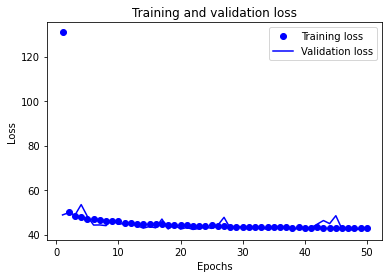

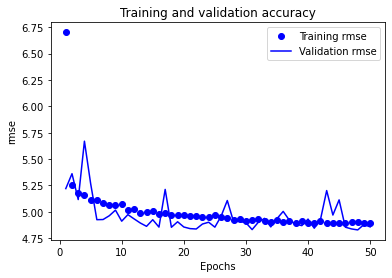

In [908]:
history_dict = history.history
# print(history_dict)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
rmse = history_dict['rmse']
epochs = range(1, len(rmse) + 1)
 
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# 
rmse_values = history_dict['rmse']
val_rmse_values = history_dict['val_rmse']
 
plt.plot(epochs, rmse_values, 'bo', label = 'Training rmse')
plt.plot(epochs, val_rmse_values, 'b', label = 'Validation rmse')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()
plt.show()

# 预测和文件输出

## 提取test数据

In [909]:
data_test

,数据ID,容纳人数,便利设施,洗手间数量,床的数量,床的类型,卧室数量,取消条款,所在城市,清洁费,...,是否支持随即预订,最近评论日期,维度,经度,民宿周边,评论个数,房产类型,民宿评分,房型,邮编
0,test_0,2,18,1.5,1.0,4,1.0,2,1,1,...,1,1564.0,41.849684,-87.676270,363,17,17,97.0,1,60608
1,test_1,2,11,2.0,1.0,4,1.0,2,3,1,...,0,1977.0,34.068613,-118.246455,150,2,0,100.0,0,90012
2,test_2,5,24,1.0,3.0,4,2.0,1,4,1,...,1,1297.0,40.701958,-73.917352,71,25,0,88.0,0,11237
3,test_3,6,8,1.0,3.0,4,1.0,2,4,1,...,0,1355.0,40.742959,-73.990820,169,12,0,82.0,0,10010
4,test_4,2,16,1.0,1.0,4,1.0,0,3,1,...,0,1481.0,34.046473,-117.734095,519,2,17,100.0,1,91766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,test_14818,4,24,1.0,2.0,4,1.0,2,4,1,...,0,1305.0,40.764226,-73.976932,296,5,0,100.0,0,10019
14819,test_14819,4,14,1.0,2.0,4,1.0,1,3,1,...,0,1560.0,34.134544,-118.360631,519,41,17,89.0,1,90068
14820,test_14820,2,9,1.0,1.0,4,1.0,1,4,1,...,0,NaN,40.649617,-74.003502,437,0,0,NaN,0,11232
14821,test_14821,10,24,1.5,3.0,4,3.0,2,3,1,...,1,1480.0,34.075903,-118.254904,150,38,17,91.0,0,90026


In [910]:
test_file=data_test.iloc[:,1:-1]
test_file.fillna(value=-1,inplace=True)
test_file=mm.fit_transform(test_file)
test_file

array([[0.06666667, 0.23684211, 0.27777778, ..., 0.5       , 0.97029703,
        0.5       ],
       [0.06666667, 0.14473684, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.26666667, 0.31578947, 0.22222222, ..., 0.        , 0.88118812,
        0.        ],
       ...,
       [0.06666667, 0.11842105, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.31578947, 0.27777778, ..., 0.5       , 0.91089109,
        0.        ],
       [0.06666667, 0.15789474, 0.22222222, ..., 0.        , 0.8019802 ,
        0.5       ]])

In [911]:
from keras import backend

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
model1=models.Sequential()
model1.add(layers.Dense(64,input_dim=23,activation="relu"))
model1.add(layers.Dense(128,activation="relu"))
model1.add(layers.Dense(64,activation="relu"))
model1.add(layers.Dense(32,activation="relu"))
model1.add(layers.Dense(16,activation="relu"))
model1.add(layers.Dense(1))
adam=optimizers.Adam(lr=0.001)
model1.compile(optimizer=adam, loss='mse', metrics=[rmse])
model1.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 64)                1536      
_________________________________________________________________
dense_128 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_129 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_130 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_131 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 17        
Total params: 20,737
Trainable params: 20,737
Non-trainable params: 0
_________________________________________________

In [844]:
model1.fit(X_train,y_train,nb_epoch =45, batch_size =64,validation_data=(X_test,y_test))

/Users/rexa/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 41501 samples, validate on 17787 samples
Epoch 1/45
41501/41501 [==============================] - 4s 86us/step - loss: 339.8691 - rmse: 10.2147 - val_loss: 51.1273 - val_rmse: 5.3229
Epoch 2/45
41501/41501 [==============================] - 3s 63us/step - loss: 49.0206 - rmse: 5.2765 - val_loss: 47.3561 - val_rmse: 5.1269
Epoch 3/45
41501/41501 [==============================] - 3s 61us/step - loss: 46.9259 - rmse: 5.1655 - val_loss: 45.4679 - val_rmse: 5.0897
Epoch 4/45
41501/41501 [==============================] - 3s 62us/step - loss: 45.8527 - rmse: 5.1129 - val_loss: 44.5411 - val_rmse: 5.0426
Epoch 5/45
41501/41501 [==============================] - 3s 61us/step - loss: 45.5192 - rmse: 5.0914 - val_loss: 45.2005 - val_rmse: 5.0403
Epoch 6/45
41501/41501 [==============================] - 3s 62us/step - loss: 45.2906 - rmse: 5.0823 - val_loss: 46.2718 - val_rmse: 5.0662
Epoch 7/45
41501/41501 [==============================] - 3s 62us/step - loss: 45.1167 - rmse: 5.0727 

In [912]:
result=model.predict(test_file)
result=pd.DataFrame(result)

In [913]:
output_file=pd.merge(data_test.iloc[:,0],result,left_index=True,right_index=True)

In [914]:
output_file.rename(columns={0:"价格"},inplace=True)
output_file.set_index("数据ID",drop=True,inplace=True)
output_file

,价格
数据ID,
test_0,58.777103
test_1,72.386299
test_2,73.666885
test_3,74.715164
test_4,59.608192
...,...
test_14818,75.353706
test_14819,61.286736
test_14820,72.337509


## 文件输出

In [915]:
output_file.to_csv("1.csv")